# Brain State Detection using Hidden Markov Models on EEG Data - Part 1

Hidden markov models (HMMs) have  become popular in financial time series analysis to determine hidden states and detect regime changes (see [for example](https://www.quantstart.com/articles/hidden-markov-models-for-regime-detection-using-r )). In such problems it isn't always clear how many hidden states there are or how to interpret them. For EEG data used in Brain Computer Interfaces (BCI), however, both the number of underlying states and their meanings are known and this should make the interpretation of results easier and more interesting. However, a potential problem with raw, unpreprocessed EEG data could be that these minute brain electrical fields measured from the scalp of a human subject are suspectible to contamination by electrical signals from other sources such as eye movements. In this first part of the project I work only with unpreprocessed EEG signals. High discrimination accuracy is not anticpated but it will be useful as a preliminary study to determine how well HMMs work under these circumstances.

 The EEG dataset used herein was taken from the [UCI Machine Learning Repository]( http://archive.ics.uci.edu/ml/datasets/EEG+Eye+State  ). It consists of 14 channels of EEG data measured by electrodes placed on the head of a subject according to the [10-20 system](https://en.wikipedia.org/wiki/10%E2%80%9320_system_(EEG) ). Data were recorded for a period of 117 seconds and consist of 14980 samples per channel. While the data were being taken a camera recorded the subject's face in order to later determine when the subject's eyes were open and closed. These observations were recorded as '1' for eyes closed and '0' for open. The eye state data forms the 15th channel in the dataset. The objective is to determine when the subject's eyes were open and closed using only the EEG data.

I now sketch the theory of HMMs and their training using the Expectation Maximization algorithm. See reference [1] for fuller explanations, however.

## Hidden Markov Models

A first-order Markov chain is a sequence of observations $\{\mathbf{x}_1, \ldots, \mathbf{x}_N \}$ in which the probability of each observation depends only on the observation immediately preceeding it: 

\begin{equation}
p(\mathbf{x}_n \mid \mathbf{x}_1, \ldots, \mathbf{x}_{n-1}) = p(\mathbf{x}_n \mid \mathbf{x}_{n-1})
\end{equation}

The joint distribution of all $N$ observations is then expressed as:

\begin{equation}
p(\mathbf{x}_1, \ldots, \mathbf{x}_N) = p(\mathbf{x}_1) \prod_{n=2}^N p(\mathbf{x}_n \mid \mathbf{x}_{n-1})
\end{equation}

More sophisticated models that allow for arbitary dependencies among the observations are Hidden Markov Models (HMMs). HMMs achieve arbitary dependency among observations by introducing latent or unobserved variables $\{ \mathbf{z}, \ldots, \mathbf{z}_N \}$ that do obey the first-order Markov property. The observations are then conditioned on the latent variables.

A HMM must provide emission probabilities, which are the probabllities of the observations conditioned on the latent variables and the parameters,  $p(\mathbf{x}_{n} \mid  \mathbf{z}_{n}, \phi )$. The joint distribution of the observations, $\mathbf{x}$, and the latent variables, $\mathbf{z}$, has the form:

\begin{equation}
p(\mathbf{x}_{1}, \ldots, \mathbf{x}_{N}, \mathbf{z}_{1}, \ldots, \mathbf{z}_{N} \mid \boldsymbol{\theta}) = p(\mathbf{z}_{1} \mid \boldsymbol{\pi} ) \prod_{n=2}^{N} p(\mathbf{z}_{n} \mid \mathbf{z}_{n-1}, \mathbf{\text{A}}) \prod_{m=1}^{N} p(\mathbf{x}_{m} \mid  \mathbf{z}_{m}, \phi )
\end{equation}

Where $\mathbf{A}$ is the transition matrix describing the probabilities of the latent variable changing from one state to another and $\boldsymbol{\theta} = \{ \boldsymbol{A}, \boldsymbol{\pi}, \phi \} $ is the parameter vector. For HMMs latent variables $\{ \mathbf{z}, \ldots, \mathbf{z}_N \}$ are the hidden states we would like to determine from the given observations $\{\mathbf{x}_1, \ldots, \mathbf{x}_N \}$.

## The Expectation Maximization Algorithm

 Consider a probabilistic dataset of $N$ obsrvations $\mathbf{X} = \{ \mathbf{x}_{1}, \ldots, \mathbf{x}_{N}\} $ and $N$ latent or unobserved variables $\mathbf{Z} = \{\mathbf{z}_1, \ldots, \mathbf{z}_N \}$. The likelihood of the data $\mathbf{X}$ given parameters $\boldsymbol{\theta}$ is:

\begin{equation}
 P (\mathbf{X} \mid \boldsymbol{\theta}) = \sum_{\mathbf{Z}}  p(\mathbf{X}, \mathbf{Z} \mid  \boldsymbol{\theta)}
\end{equation}

Where $p(\mathbf{X}, \mathbf{Z} \mid  \boldsymbol{\theta})$ is the joint probability of the data, $\mathbf{X}$, and the latent variables, $\mathbf{Z}$,  given the parameters, $\boldsymbol{\theta}$. In maximum likelihood (ML) methods we  maximize the likelihood of the data with respect to the parameters and the parameters $\theta$ that achieve this are the ML estimate for the original parameters. However, this expression is in general difficult to maximize analytically and therefore we turn to the EM method. The EM algorithm is an iterative procedure consisisting of two steps, called the $E$ and the $M$ steps, that are repeated until convergence. At convergence an ML estimate for $\theta$ is obtained. We start the iterative process with an initial choice of paramters $ \boldsymbol{\theta}^{old}$ and then in the $\text{E}$ step we determine the posterior distribution of the latent variables $ \text{p}(\mathbf{Z} \mid \mathbf{X}, \boldsymbol{\theta}^{old}) $. This posterior is then used to obtain an expectation of the log likelihood function $\text{Q}(\boldsymbol{\theta}, \boldsymbol{\theta}^{old})$

\begin{equation}
Q( \boldsymbol{\theta} , \boldsymbol{\theta^{old}}) = \sum_{\mathbf{Z}} p(\mathbf{Z} \mid \mathbf{X}, \boldsymbol{\theta}^{old}) \ln p(\mathbf{X}, \mathbf{Z} \mid \boldsymbol{\theta})
\end{equation}

In the $M$ step this expectation is maximized with respect to the parameters $\boldsymbol{\theta}$ while keeping everything else constant given a new set of parameters $\boldsymbol{\theta}^{new}$. If the algorithm has not converged  the $\boldsymbol{\theta}^{new}$ parameters are passed onto another $E$ and $M$ step until convergence is achieved. Using information theoretic arguments it can be proved that each EM cycle increases the data likelihood and therefore moves closer to the ML estimates of the parameters.

## HMM Training using EM

 When training HHMs using the Expectation Maximization algorithm, during the $E$ step the following posterior probabilies are obtained:

\begin{equation}
\gamma (\mathbf{z}_{n}) = p(\mathbf{z}_{n} \mid \mathbf{X},  \boldsymbol{\theta}^{old})
\end{equation}

\begin{equation}
\xi (\mathbf{z}_{n}, \mathbf{z}_{n-1}) = p( \mathbf{z}_{n} \mid \mathbf{z}_{n-1} \mid \mathbf{X}, \boldsymbol{\theta}^{old}) 
\end{equation}

Where $\gamma (\mathbf{z}_{n}) $ is the marginal posterior probablity of the latent variable $\mathbf{z}_n$ and $\xi (\mathbf{z}_{n}, \mathbf{z}_{n-1})$ is the joint posterior probablity of two successive latent variables. In the $M$ step the above posterior probabilities are kept constant while $Q$ is maximized with respect to $\boldsymbol{\theta}$,  to give a new updated parameter vector $\boldsymbol{\theta}^{new}$, which in the case of Gaussian emissions would be the means, $\mu_k$, and the covariance matrices,  $\Sigma_k$.

During the $E$ step the posterior probabilities can be computed using the **Forward-Backword algorithm**. There are several variants of this algorithm, but in the $\alpha-\beta$ version the posterior probabilities are factorized in the following fashion:

\begin{equation} \gamma  ( \mathbf{z}_{n} ) = \frac{\alpha(\mathbf{z}_{n}) \beta( \mathbf{z}_{n})}{ \text{p} (\mathbf{X})}  \end{equation} 

and 

\begin{equation} \xi (\mathbf{z}_{n}, \mathbf{z}_{n-1}) = \frac{\alpha (\mathbf{z}_{n})  \text{p} (\mathbf{x}_{n} \mid \mathbf{z}_{n})  \text{p} ( \mathbf{z}_{n} \mid \mathbf{z}_{n-1})\beta ( \mathbf{z}_{n-1})}{ \text{p} (\mathbf{X})} \end{equation}

Recursive relations for  $\alpha (\mathbf{z}_{n})$ and $\beta (\mathbf{z}_{n})$ factors can be derived:

\begin{equation}
\alpha (\mathbf{z}_{n}) = p(\mathbf{x}_{n} \mid \mathbf{z}_{n})  \sum_{\mathbf{n}-1} \alpha (\mathbf{z}_{n-1}) p(\mathbf{z}_{n} \mid \mathbf{z}_{n-1})
\end{equation}


\begin{equation}
\beta (\mathbf{z}_{n}) = \sum_{n+1} \beta (\mathbf{z}_{n+1}) p(\mathbf{x}_{n+1} \mid \mathbf{z}_{n+1}) p(\mathbf{z}_{n+1} \mid \mathbf{z}_{n})
\end{equation}

In order to start these recursions we need initial values, which are given by:

\begin{equation}
\alpha(\mathbf{z}_1) = p(\mathbf{x}_1, \mathbf{z}_1) = p(\mathbf{z}_1) p( \mathbf{x}_1 \mid \mathbf{z}_1) \prod_{k=1}^K \{ \pi_k p(\mathbf{x}_1 \mid \phi_k  \}^{z_{1k}}
\end{equation}

\begin{equation}
p(\mathbf{z}_N , \mathbf{X}) = \frac{ p (\mathbf{X}, \mathbf{z}_N ) \beta(\mathbf{z}_N)}{ p (\mathbf{X})}
\end{equation}

## The Viterbi Decoder

The Viterbi algorithm determines the most probable *sequence*  of hidden states. A raw calculation to determine the optimal sequence would require an enormous number of calculations, but the Viterbi algorithm exploits the lattice structure of the HMM algorithm to efficently determine it. The Viterbi algorithm makes use of the forward part of the forward-backward algorithm desribed above. In addition, it introduces a back-tracking function, $\psi$ that keeps a tab on the most probable sequence of hidden variables while the algorithm builds up this optimal sequence, as it iterates from the first observation to the last. Good and more complete discussions can be found in references [3] and [4].

# Regime Change Detection of Simulated Data

Before analyzing the EEG data I carry out preliminary experiments on simulated data. The artificial subsignals consist of Gaussian signals with different variances and/or means stiched together to form a composite signal. A HMM is then trained on the data to see if it can detect the regime changes.  

In [3765]:
import pandas as pd
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-white')
import seaborn as sns
#sns.set()
#sns.set_style("whitegrid")
#sns.set_context("poster")

In [3766]:
def printHMMinfo(model):
    print("Transition Matrix:")
    print(model.transmat_)
    print("means:")
    print(model.means_)
    print('covariances:')
    print(model.covars_)

### First Artificial Signal

The first artificial signal consists of 4 segments of Gaussian white noise of variances 0.1 and 0.11 and means 0.1 and -0.05. These two kinds of Gaussian signal are the two states which the HMM will be trained to detect. Three regime changes occur after 50, 100, and 175 data points. The entire composite signal has a length of 225 data points.

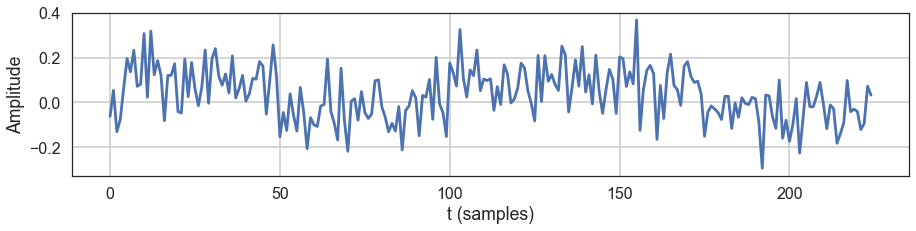

In [3767]:
plt.figure(figsize=(15,3))
sig1 = np.random.normal(0.1, 0.1,50)
sig2 = np.random.normal(-0.05,0.11,50)
sig3 = np.random.normal(0.1,0.1,75)
sig4 = np.random.normal(-0.05,0.11,50)
sig = (np.concatenate((sig1, sig2, sig3, sig4)))
plt.plot(sig)
plt.xlabel('t (samples)')
plt.ylabel('Amplitude')
plt.grid()

state = np.concatenate((np.ones(50), np.zeros(50), np.ones(75), np.zeros(50)))
state_len = np.shape(state)[0]

Using functions provided by the hmmlearn module I fit a 2 state HMM with Gaussian emissions to the data.

In [3768]:
sig = sig.reshape(-1,1)
remodel = hmm.GaussianHMM( n_components=2, covariance_type="full", algorithm = 'viterbi', n_iter=100)
remodel.fit(sig)

C:\Users\jamil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jamil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jamil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jamil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=2, n_iter=100, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

Use the fitted HMM to predict the hidden states found:

In [3769]:
Zgauss1 = remodel.predict(sig)
Zgauss2 = Zgauss1 == 0

C:\Users\jamil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)



Let's view the estimated parameters and plot graphs of the signal and the two hidden states found:

In [3770]:
printHMMinfo(remodel)

Transition Matrix:
[[ 0.97739054  0.02260946]
 [ 0.01813255  0.98186745]]
means:
[[-0.0404746 ]
 [ 0.09958433]]
covariances:
[[[ 0.00797791]]

 [[ 0.00964927]]]


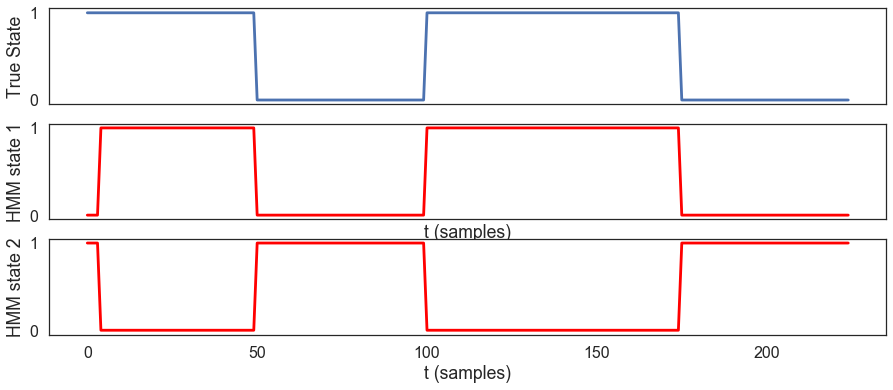

In [3771]:
f, axarr = plt.subplots(3, sharex=True, figsize=(15,6))

axarr[0].plot(state)
axarr[0].set_ylabel('True State')
axarr[1].plot(Zgauss1, 'r')
axarr[1].set_xlabel('t (samples)')
axarr[1].set_ylabel('HMM state 1')
axarr[2].plot(Zgauss2, 'r')
axarr[2].set_xlabel('t (samples)')
axarr[2].set_ylabel('HMM state 2')

The HMM does not tell us which of the states it has found corresponds to eyes open and which to eyes closed. This - the label-switching problem - needs further processing, but it isn't important for our purposes. I next compute the discrimination accuracy:

In [3772]:
ratio1 = np.sum((Zgauss1 ==  state))/state_len
ratio2 = np.sum((Zgauss2 == state ))/state_len
print('Accuracy is %f :%f ' %(ratio1*100, ratio2*100))

Accuracy is 98.222222 :1.777778 


The worse possible performance would be 50:50, in other words if only half the states are  determined accurately, which, with only two states, is only as good as random guessing. The best peformances are 100:0 and 0:100. Results vary with runs but with a typical accuracy of 99% we see that the HMM is able to discriminate hidden states with very high accuracy. Usually errors are only made during the first few steps of a regime change. It's unsurprizing that a few data points are needed by the algorithm to detect a statistical change in the data.

### Second Artificial Signal

I repeat the above experiment but with a different simulated signal. This signal is made up of two subsignals, which correspond to the two hidden states, consisting of Gaussian random noise of variance 0.1 but differing means of 0.1 and -0.05. The joins occur after 25, 50, 75, 125 and 150 points. There are therefore 5 regime changes in this data and the total number of data points is 185.

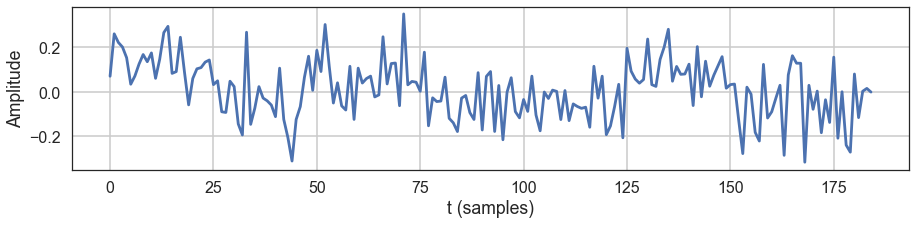

In [3773]:
plt.figure(figsize=(15,3))
sig1 = np.random.normal(0.1, 0.1,25)
sig2 = np.random.normal(-0.05,0.1,25)
sig3 = np.random.normal(0.1,0.1,25)
sig4 = np.random.normal(-0.05,0.1,50)
sig5 = np.random.normal(0.1,0.1,25)
sig6 = np.random.normal(-0.05,0.1,35)                       
sigB = (np.concatenate((sig1, sig2, sig3, sig4, sig5,sig6)))
plt.plot(sigB)
plt.xlabel('t (samples)')
plt.ylabel('Amplitude')
plt.grid()

stateB = np.concatenate((np.ones(25), np.zeros(25), np.ones(25), np.zeros(50), np.ones(25), np.zeros(35)))

stateB_len = np.shape(stateB)[0]

In [3774]:
sigB = sigB.reshape(-1,1)
remodel = hmm.GaussianHMM( n_components=2, covariance_type="full", algorithm = 'viterbi', n_iter=100)
remodel.fit(sigB)

C:\Users\jamil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jamil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jamil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jamil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=2, n_iter=100, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [3775]:
ZgaussB1 = remodel.predict(sigB)
ZgaussB2 = ZgaussB1 == 0

C:\Users\jamil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [3776]:
printHMMinfo(remodel)

Transition Matrix:
[[ 0.96225054  0.03774946]
 [ 0.06486004  0.93513996]]
means:
[[-0.05624305]
 [ 0.10565728]]
covariances:
[[[ 0.01242193]]

 [[ 0.00844505]]]


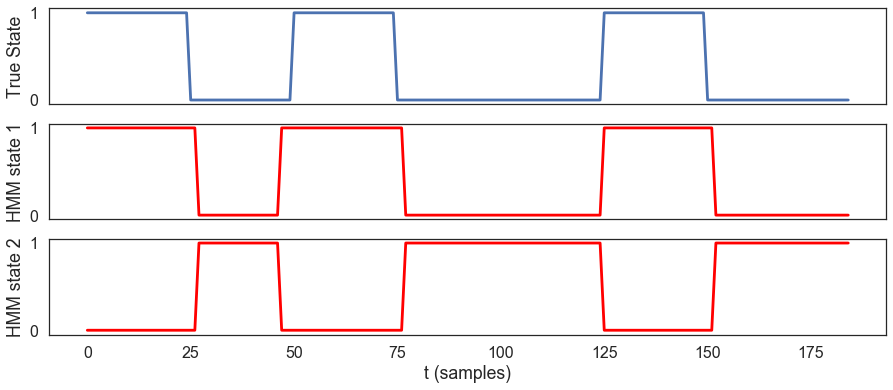

In [3777]:
f, axarr = plt.subplots(3, sharex=True, figsize=(15,6))

axarr[0].plot(stateB)
axarr[0].set_ylabel('True State')
axarr[1].plot(ZgaussB1, 'r')
axarr[1].set_ylabel('HMM state 1')
axarr[2].plot(ZgaussB2, 'r')
axarr[2].set_xlabel('t (samples)')
axarr[2].set_ylabel('HMM state 2')

In [3778]:
ratioB1 = np.sum((ZgaussB1 ==  stateB))/stateB_len
ratioB2 = np.sum((ZgaussB2 == stateB ))/stateB_len
print('Accuracy is %f:%f' %(ratioB1*100, ratioB2*100))

Accuracy is 95.135135:4.864865


Once again the HMM attains very high discrimination accuracy.

# The EEG Dataset

I load the dataset into a pandas dataframe and print it out. Channels C1 and C2 are missing. This is surprizing since these two channels are usually considered the most important for brain state discrimination. After some experimentation it was determied that the channels O1 and O2 gave the best performance and therefore results for these channels are presented.

In [3779]:
eeg_df = pd.read_csv("c:/users/jamil/broenlee/EEGlatest3.csv")
eeg_df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetect
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [3780]:
eeg_df.tail()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetect
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1
14979,4287.69,3997.44,4260.00,4121.03,4333.33,4616.41,4088.72,4638.46,4212.31,4226.67,4167.69,4274.36,4597.95,4350.77,1


To get a better feeling for the EEG data let's plot it.

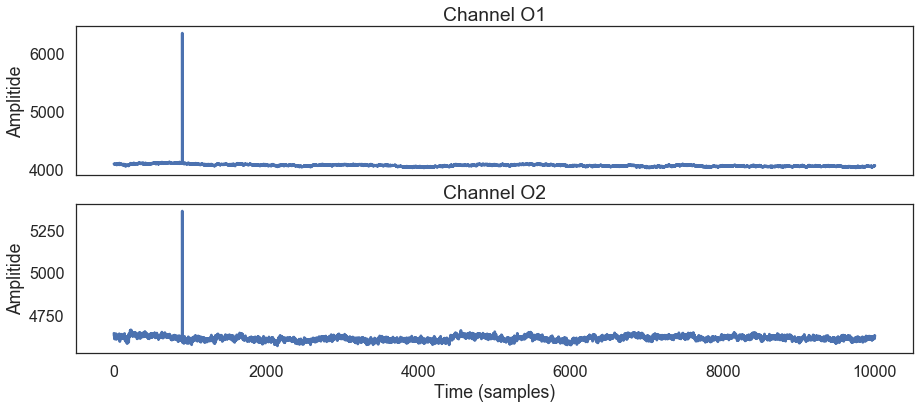

In [3781]:
# Two subplots, the axes array is 1-d

f, axarr = plt.subplots(2, sharex=True, figsize=(15,6))

axarr[0].plot( eeg_df['O1'][:10000])
#axarr[0].set_xlabel('Time in Seconds')
axarr[0].set_title('Channel O1')
axarr[0].set_ylabel('Amplitide')

axarr[1].plot(eeg_df['O2'][:10000])
axarr[1].set_xlabel('Time (samples)')
axarr[1].set_ylabel('Amplitide')
axarr[1].set_title('Channel O2')


A plot of the EEG signals shows a very large spike present in both channels. This spike is probably due to a spike in electricity. I identify the exact location of this spike and replace the affected EEG value with the mean of the values on either side.

In [3782]:
np.max(eeg_df['O1'][:10000]), np.argmax(eeg_df['O1'][:10000])

(6350.2600000000002, 898)

In [3783]:
np.max(eeg_df['O2'][:10000]), np.argmax(eeg_df['O2'][:10000])

(5361.54, 898)

In [3784]:
#eeg_df['O2'][898] = None
#eeg_df.apply(pd.Series.interpolate)
eeg_df['O2'][898] = np.mean([eeg_df['O2'][897],eeg_df['O2'][899]]  )
eeg_df['O2'][898]

C:\Users\jamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


4605.8999999999996

In [3785]:
eeg_df['O1'][898] = np.mean([eeg_df['O1'][897],eeg_df['O1'][899]]  )
eeg_df['O1'][898]

C:\Users\jamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


4108.7200000000003

Plotting both signals again:

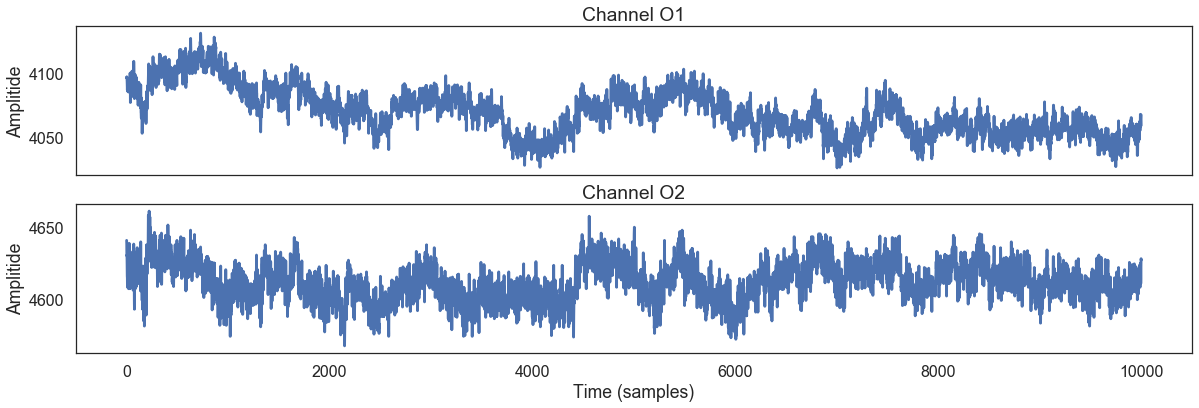

In [3786]:
f, axarr = plt.subplots(2, sharex=True, figsize=(20,6))

axarr[0].plot( eeg_df['O1'][:10000])
#axarr[0].set_xlabel('Time in Seconds')
axarr[0].set_title('Channel O1')
axarr[0].set_ylabel('Amplitide')

axarr[1].plot(eeg_df['O2'][:10000])
axarr[1].set_xlabel('Time (samples)')
axarr[1].set_ylabel('Amplitide')
axarr[1].set_title('Channel O2')

The signals have the appearance of typical EEG signals but with the presence of artefacts. The signals from either side of the head differ considerably in amplitude.

## HMMs Applied to EEG Data

## Channel O1

I specify a HMM model with 2 hidden components and Gaussian emissions and fit this model to the EEG data from channel O1.

In [3787]:
# number of components
comps = 2

remodel = hmm.GaussianHMM(n_components=comps, covariance_type="full", algorithm='viterbi', n_iter=100)
X1 = eeg_df['O1'][:10000]
X1 = X1[:, None]
remodel.fit(X1)


C:\Users\jamil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jamil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jamil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jamil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=2, n_iter=100, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

Print the fitted parameters:

In [3788]:
printHMMinfo(remodel)

Transition Matrix:
[[ 0.99459708  0.00540292]
 [ 0.00595098  0.99404902]]
means:
[[ 4083.25816989]
 [ 4054.16859157]]
covariances:
[[[ 165.93031237]]

 [[  73.14630444]]]


Use the fitted model generate predictions for the two hidden states and plot the results.

In [3789]:
Z1 = remodel.predict(X1)
Z2 = Z1 == 0

C:\Users\jamil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


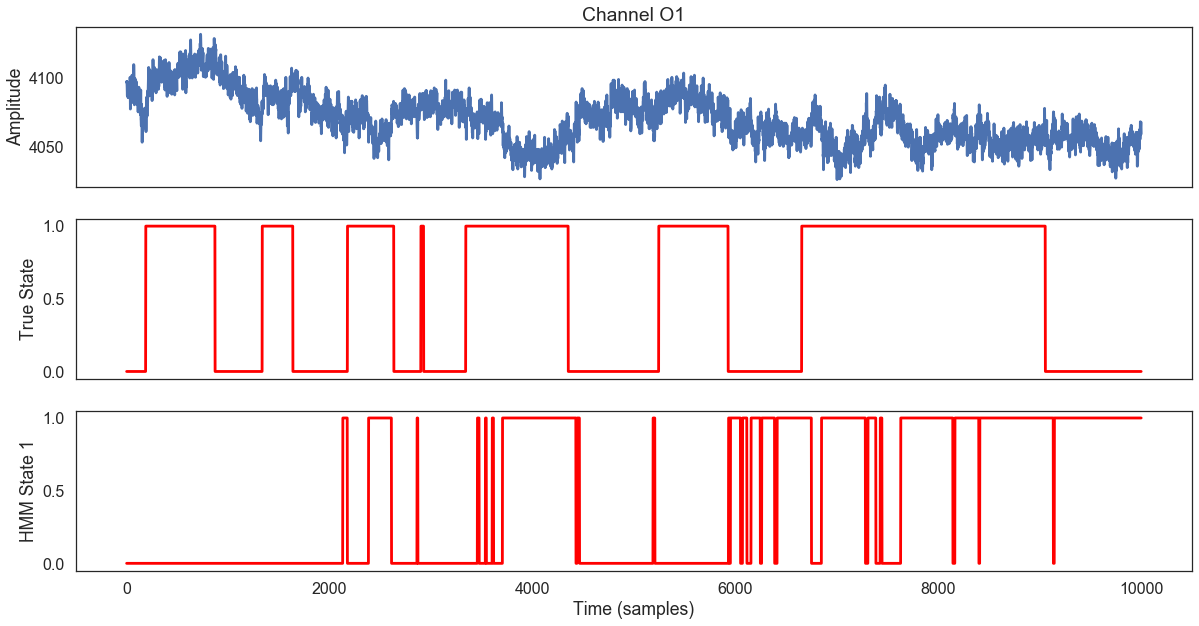

In [3790]:
f, axarr = plt.subplots(3, sharex=True, figsize=(20,10))

axarr[0].plot( eeg_df['O1'][:10000])
axarr[0].set_ylabel('Amplitude')
axarr[0].set_title('Channel O1')
axarr[1].plot( eeg_df['eyeDetect'][:10000], 'r')
axarr[1].set_ylabel('True State')
axarr[2].plot(Z1, 'r')
axarr[2].set_xlabel('Time (samples)')
axarr[2].set_ylabel('HMM State 1')


To avoid cluttering I print predicted hidden state data only for one state. The results look poor but let's quantify them.

In [3791]:
eyeDet_len = np.shape((eeg_df['eyeDetect'][:10000]))[0]


ratio1 = np.sum((Z1 ==  eeg_df['eyeDetect'][:10000]))/eyeDet_len
ratio2 = np.sum((Z2 ==  eeg_df['eyeDetect'][:10000]))/eyeDet_len

print('Accuracy is %3f:%3f' %(ratio1*100, ratio2*100))

Accuracy is 56.500000:43.500000


We see that with a large dataset of 10 000 we obtain a statisticaly signficant discrimination accuracy of around 56%. Therefore though the method as it is isn't useful for practical state change detection it does possess some discrimination ability.

## Channel O2.

The above analysis is repeated on EEG data from channel O2.

In [3792]:
remodel = hmm.GaussianHMM(n_components=comps, covariance_type="full", algorithm='viterbi', n_iter=100)
X2 = eeg_df['O2'][:10000]
X2 = X2[:, None] 
remodel.fit(X2)

C:\Users\jamil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jamil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jamil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jamil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=2, n_iter=100, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [3793]:
printHMMinfo(remodel)

Transition Matrix:
[[ 0.98204725  0.01795275]
 [ 0.01641212  0.98358788]]
means:
[[ 4622.19159587]
 [ 4602.42737589]]
covariances:
[[[ 78.61501007]]

 [[ 79.98125781]]]


In [3794]:
Z2 = remodel.predict(X2)
Z2B = Z2 == 0

C:\Users\jamil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


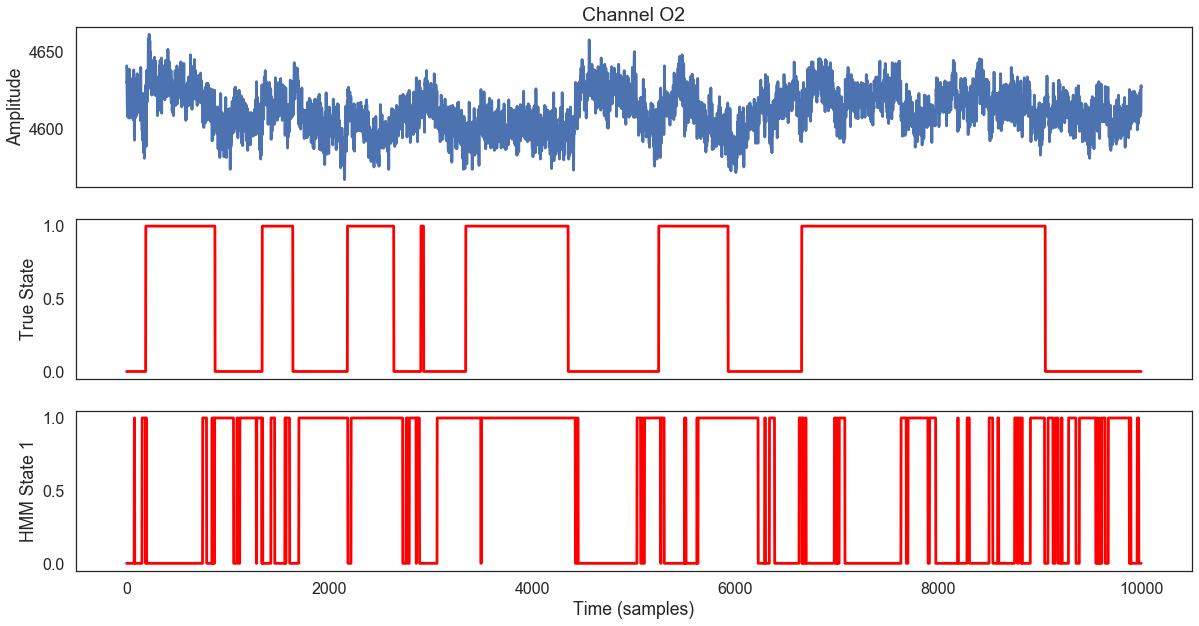

In [3795]:
f, axarr = plt.subplots(3, sharex=True, figsize=(20,10))

axarr[0].plot( eeg_df['O2'][:10000])
#axarr[0].set_grid()
axarr[0].set_ylabel('Amplitude')
axarr[0].set_title('Channel O2')
axarr[1].plot( eeg_df['eyeDetect'][:10000], 'r')
axarr[1].set_ylabel('True State')
plt.grid()
axarr[2].plot(Z2, 'r')
axarr[2].set_xlabel('Time (samples)')
axarr[2].set_ylabel('HMM State 1')
plt.grid()

In [3796]:
ratio1 = np.sum((Z2 ==  eeg_df['eyeDetect'][:10000]))/eyeDet_len
ratio2 = np.sum((Z2B ==  eeg_df['eyeDetect'][:10000]))/eyeDet_len

print('Accuracy is %f:%f' %(ratio1*100, ratio2*100))


Accuracy is 43.940000:56.060000


Therefore the result for channel O2 is similiar to that for channel O1.

# Conclusion

The performance of HMMs on raw EEG data for state change detection is rather poor. However, HMMs did possess some ability to discriminate brain states, correctly identifiying a state around 56% of the time. Clearly, the performance needs to be improved in order to be of any use in a practical scenario. As a check I used the variational Bayesian HMM routines from the sklearn-bayes module on the same data, though the results aren't presented here. The results thereby obtained were qualitatively the same as the ones presented here but somewhat inferior quantitatively, which is what we would expect when using a variational approximation. 

A major reason for the  poor performance obtained is almost certainly the presence in the EEG signal of  trends and of interfering signals from eye and muscle movements. Cleaning the data should result in improved state discrimination performance. The second part of this  project will therefore preprocess the EEG before applying HMMs.  Solvay-Golay filters should help to smooth and detrend the raw data and principal components analysis (PCA) or independent components analysis (ICA) will help remove artefacts from eye and muscle movements. 

# Bibliography

1. Pattern Recogntion and Machine Learning by Christopher Bishop, 2006. 
*  The Variational Approximation for Bayesian Inference, Tzikas et al,  IEEE Signal Processing Magazine, 2008.
*  Hidden Markov Models, Chapter 9, Jurafsky and Martin, Speech and Language Processing, 2016.
* A Tutorial on Hidden Markov Models and Selected Applications in Speech Recognition, L. R. Rabiner, Proc. of the IEEE, 1989